## Part 1: Explore the Data

Import the data and use Pandas to learn more about the dataset.

In [1]:
import pandas as pd

df = pd.read_csv('Resources/client_dataset.csv')

df.head()

,first,last,job,phone,email,client_id,order_id,order_date,order_week,order_year,item_id,category,subcategory,unit_price,unit_cost,unit_weight,qty,line_number
0,Donald,Harding,Immunologist,793-904-7725x39308,harding.donald.7185@sullivan.com,58515,8953482,2023-04-28,17,2023,EUD29711-63-6U,decor,wall art,1096.80,762.71,7.50,105,1
1,Tiffany,Myers,Music therapist,201.442.4543x942,myers.t.6537@ferguson-johnson.net,37609,8069089,2023-05-19,20,2023,XDA18116-89-4A,consumables,pens,24.95,15.09,1.49,21,0
2,Shannon,Watson,Immunologist,687.737.9424x8503,swatson8146@payne.net,57113,1902144,2023-01-29,4,2023,ABE59463-05-7E,software,project management,13.52,7.86,1.68,39,6
3,Nathan,Baker,Accounting technician,827-788-8123x012,bakernathan@benson.com,46554,9031802,2023-04-25,17,2023,ZMM00836-65-0C,consumables,pens,36.42,24.85,1.23,29,3
4,Christina,Schwartz,Chiropractor,265-829-3643,christinaschwartz9252@mcconnell.com,92089,1322274,2023-05-28,21,2023,BZX55559-12-3X,consumables,misc,195.10,108.17,46.43,20,1


In [2]:
# View the column names in the data
df.columns


Index(['first', 'last', 'job', 'phone', 'email', 'client_id', 'order_id',
       'order_date', 'order_week', 'order_year', 'item_id', 'category',
       'subcategory', 'unit_price', 'unit_cost', 'unit_weight', 'qty',
       'line_number'],
      dtype='object')

In [3]:
# Use the describe function to gather some basic statistics
df.describe()


,client_id,order_id,order_week,order_year,unit_price,unit_cost,unit_weight,qty,line_number
count,54639.000000,5.463900e+04,54639.000000,54639.000000,54639.000000,54639.000000,54639.000000,5.463900e+04,54639.000000
mean,54837.869416,5.470190e+06,11.359139,2022.993064,136.267207,99.446073,5.004116,5.702646e+02,2.979667
std,25487.438231,2.599807e+06,7.023499,0.082997,183.873135,133.164267,5.326599,1.879552e+04,2.436320
min,10033.000000,1.000886e+06,1.000000,2022.000000,0.010000,0.010000,0.000000,0.000000e+00,0.000000
25%,33593.000000,3.196372e+06,6.000000,2023.000000,20.800000,14.840000,1.450000,3.200000e+01,1.000000
50%,53305.000000,5.496966e+06,11.000000,2023.000000,68.310000,49.890000,3.240000,6.800000e+01,3.000000
75%,78498.000000,7.733869e+06,17.000000,2023.000000,173.160000,125.570000,6.890000,1.700000e+02,5.000000
max,99984.000000,9.998480e+06,52.000000,2023.000000,1396.230000,846.270000,46.430000,3.958244e+06,9.000000


In [4]:
# Use this space to do any additional research
df.info()
# and familiarize yourself with the data.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54639 entries, 0 to 54638
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   first        54639 non-null  object 
 1   last         54639 non-null  object 
 2   job          54639 non-null  object 
 3   phone        54639 non-null  object 
 4   email        54639 non-null  object 
 5   client_id    54639 non-null  int64  
 6   order_id     54639 non-null  int64  
 7   order_date   54639 non-null  object 
 8   order_week   54639 non-null  int64  
 9   order_year   54639 non-null  int64  
 10  item_id      54639 non-null  object 
 11  category     54639 non-null  object 
 12  subcategory  54639 non-null  object 
 13  unit_price   54639 non-null  float64
 14  unit_cost    54639 non-null  float64
 15  unit_weight  54639 non-null  float64
 16  qty          54639 non-null  int64  
 17  line_number  54639 non-null  int64  
dtypes: float64(3), int64(6), object(9)
memory usag

In [5]:
# What three item categories had the most entries?
df['category'].value_counts().head(3)


category
consumables    23538
furniture      11915
software        8400
Name: count, dtype: int64

In [6]:
# For the category with the most entries,
# which subcategory had the most entries?
df['subcategory'].value_counts().head(1)


subcategory
bathroom supplies    6424
Name: count, dtype: int64

In [7]:
# Which five clients had the most entries in the data?
df['client_id'].value_counts().head(5)


client_id
33615    220
66037    211
46820    209
38378    207
24741    207
Name: count, dtype: int64

In [8]:
# Store the client ids of those top 5 clients in a list.
top_5_clients = list(df['client_id'].value_counts().head(5).index)
top_5_clients


[33615, 66037, 46820, 38378, 24741]

In [9]:
# How many total units (the qty column) did the
# client with the most entries order order?
top_1_client = df.loc[df['client_id'] == 33615, 'qty'].sum()
top_1_client


64313

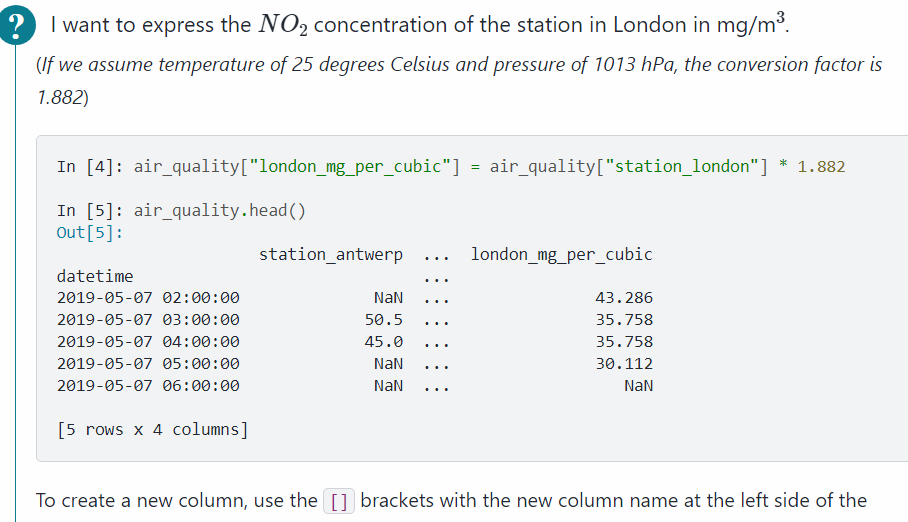

## Part 2: Transform the Data
Do we know that this client spent the more money than client 66037? If not, how would we find out? Transform the data using the steps below to prepare it for analysis.

In [10]:
# Create a column that calculates the 
# subtotal for each line using the unit_price
# and the qty
unit_price = df['unit_price']
qty = df['qty']

df['sub_total']= qty*unit_price
df.head()


,first,last,job,phone,email,client_id,order_id,order_date,order_week,order_year,item_id,category,subcategory,unit_price,unit_cost,unit_weight,qty,line_number,sub_total
0,Donald,Harding,Immunologist,793-904-7725x39308,harding.donald.7185@sullivan.com,58515,8953482,2023-04-28,17,2023,EUD29711-63-6U,decor,wall art,1096.80,762.71,7.50,105,1,115164.00
1,Tiffany,Myers,Music therapist,201.442.4543x942,myers.t.6537@ferguson-johnson.net,37609,8069089,2023-05-19,20,2023,XDA18116-89-4A,consumables,pens,24.95,15.09,1.49,21,0,523.95
2,Shannon,Watson,Immunologist,687.737.9424x8503,swatson8146@payne.net,57113,1902144,2023-01-29,4,2023,ABE59463-05-7E,software,project management,13.52,7.86,1.68,39,6,527.28
3,Nathan,Baker,Accounting technician,827-788-8123x012,bakernathan@benson.com,46554,9031802,2023-04-25,17,2023,ZMM00836-65-0C,consumables,pens,36.42,24.85,1.23,29,3,1056.18
4,Christina,Schwartz,Chiropractor,265-829-3643,christinaschwartz9252@mcconnell.com,92089,1322274,2023-05-28,21,2023,BZX55559-12-3X,consumables,misc,195.10,108.17,46.43,20,1,3902.00


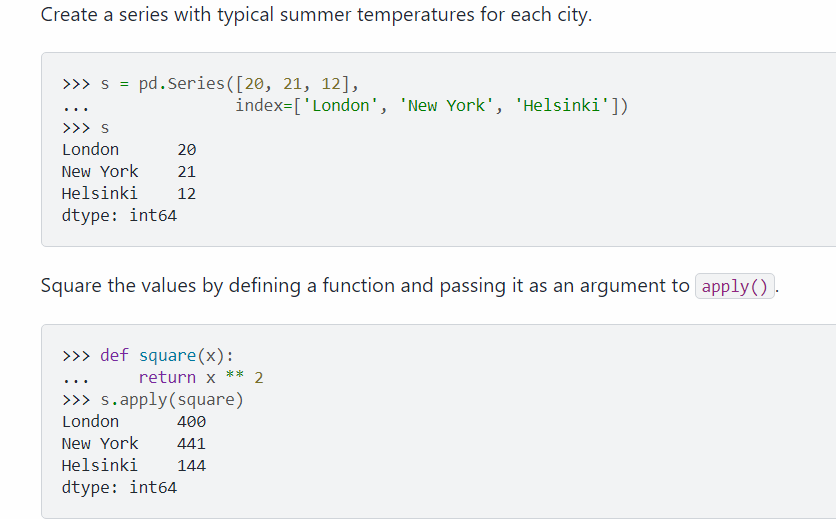

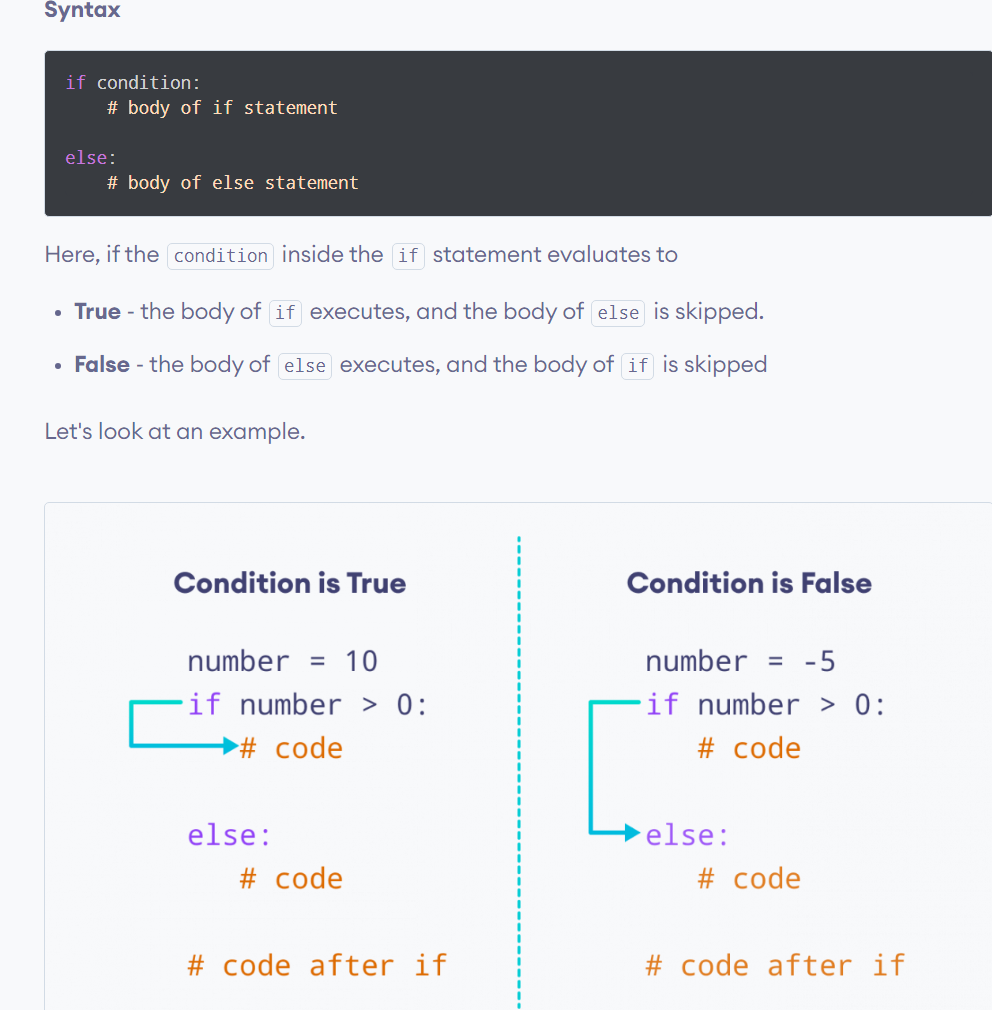

In [11]:
# Create a column for shipping price.
# Assume a shipping price of $7 per pound
# for orders over 50 pounds and $10 per
# pound for items 50 pounds or under.
unit_weight = df['unit_weight']

total_weight = unit_weight*qty
total_weight

def shipping_price(each_weight):
    if each_weight> 50:
        return each_weight*7 
    else: 
        return each_weight*10
df['shipping_price'] = total_weight.apply(shipping_price)
df.head()


,first,last,job,phone,email,client_id,order_id,order_date,order_week,order_year,item_id,category,subcategory,unit_price,unit_cost,unit_weight,qty,line_number,sub_total,shipping_price
0,Donald,Harding,Immunologist,793-904-7725x39308,harding.donald.7185@sullivan.com,58515,8953482,2023-04-28,17,2023,EUD29711-63-6U,decor,wall art,1096.80,762.71,7.50,105,1,115164.00,5512.50
1,Tiffany,Myers,Music therapist,201.442.4543x942,myers.t.6537@ferguson-johnson.net,37609,8069089,2023-05-19,20,2023,XDA18116-89-4A,consumables,pens,24.95,15.09,1.49,21,0,523.95,312.90
2,Shannon,Watson,Immunologist,687.737.9424x8503,swatson8146@payne.net,57113,1902144,2023-01-29,4,2023,ABE59463-05-7E,software,project management,13.52,7.86,1.68,39,6,527.28,458.64
3,Nathan,Baker,Accounting technician,827-788-8123x012,bakernathan@benson.com,46554,9031802,2023-04-25,17,2023,ZMM00836-65-0C,consumables,pens,36.42,24.85,1.23,29,3,1056.18,356.70
4,Christina,Schwartz,Chiropractor,265-829-3643,christinaschwartz9252@mcconnell.com,92089,1322274,2023-05-28,21,2023,BZX55559-12-3X,consumables,misc,195.10,108.17,46.43,20,1,3902.00,6500.20


In [14]:
# Create a column for the total price
# using the subtotal and the shipping price
# along with a sales tax of 9.25%

sub_total =df['qty']*unit_price
sub_total

total_price = (df['shipping_price'] + df['sub_total'])
total_price = total_price + total_price*.0925
total_price
#total_and_shipping = [sub_total + shipping_price]
#total_and_shipping
sub_total = df['qty'] * unit_price
total_price = df['shipping_price'] + sub_total
total_price = total_price + total_price * 0.0925
df['total_price'] = total_price

df.head()

,first,last,job,phone,email,client_id,order_id,order_date,order_week,order_year,...,category,subcategory,unit_price,unit_cost,unit_weight,qty,line_number,sub_total,shipping_price,total_price
0,Donald,Harding,Immunologist,793-904-7725x39308,harding.donald.7185@sullivan.com,58515,8953482,2023-04-28,17,2023,...,decor,wall art,1096.80,762.71,7.50,105,1,115164.00,5512.50,131839.076250
1,Tiffany,Myers,Music therapist,201.442.4543x942,myers.t.6537@ferguson-johnson.net,37609,8069089,2023-05-19,20,2023,...,consumables,pens,24.95,15.09,1.49,21,0,523.95,312.90,914.258625
2,Shannon,Watson,Immunologist,687.737.9424x8503,swatson8146@payne.net,57113,1902144,2023-01-29,4,2023,...,software,project management,13.52,7.86,1.68,39,6,527.28,458.64,1077.117600
3,Nathan,Baker,Accounting technician,827-788-8123x012,bakernathan@benson.com,46554,9031802,2023-04-25,17,2023,...,consumables,pens,36.42,24.85,1.23,29,3,1056.18,356.70,1543.571400
4,Christina,Schwartz,Chiropractor,265-829-3643,christinaschwartz9252@mcconnell.com,92089,1322274,2023-05-28,21,2023,...,consumables,misc,195.10,108.17,46.43,20,1,3902.00,6500.20,11364.403500


In [15]:
# Create a column for the cost
# of each line using unit cost, qty, and
# shipping price (assume the shipping cost
# is exactly what is charged to the client).
line_cost = df['qty'] * unit_price + df['shipping_price']
df['line_cost'] = line_cost

In [16]:
# Create a column for the profit of
# each line using line cost and line price

line_profit = df['total_price'] - df['line_cost']

df['line_profit'] = line_profit

## Part 3: Confirm your work
You have email receipts showing that the total prices for 3 orders. Confirm that your calculations match the receipts. Remember, each order has multiple lines.

Order ID 2742071 had a total price of \$152,811.89

Order ID 2173913 had a total price of \$162,388.71

Order ID 6128929 had a total price of \$923,441.25


In [17]:
# Check your work using the totals above
order_totals = df.groupby('order_id')['total_price'].sum()

# Print the calculated totals
print("Calculated total prices:")
print(order_totals)

# Comparing 
provided_totals = {
    '2742071': 152811.89,
    '2173913': 162388.71,
    '6128929': 923441.25
}

for order_id, total_price in provided_totals.items():
    calculated_total = order_totals.get(order_id, 0)
    print(f"Order ID {order_id}: Calculated total price = ${calculated_total:.2f}, Provided total price = ${total_price}")

Calculated total prices:
order_id
1000886    1.071674e+05
1001431    4.267719e+05
1003003    1.263008e+04
1003666    7.647397e+05
1004537    1.268768e+05
               ...     
9995243    2.104585e+06
9995530    8.504719e+03
9997244    1.511255e+05
9997426    1.130257e+03
9998480    5.015510e+04
Name: total_price, Length: 10000, dtype: float64
Order ID 2742071: Calculated total price = $0.00, Provided total price = $152811.89
Order ID 2173913: Calculated total price = $0.00, Provided total price = $162388.71
Order ID 6128929: Calculated total price = $0.00, Provided total price = $923441.25


## Part 4: Summarize and Analyze
Use the new columns with confirmed values to find the following information.

In [22]:
# How much did each of the top 5 clients by quantity
# spend? Check your work from Part 1 for client ids.
client_spending = df.groupby('client_id')['total_price'].sum()
client_spending_sorted = client_spending.sort_values(ascending=False)
top_5_clients = client_spending_sorted.head(5)
print("Spending of each of the top 5 clients by quantity:")
print(top_5_clients)
print('client_id')

Spending of each of the top 5 clients by quantity:
client_id
78965    6.559237e+08
85931    2.374170e+08
38473    1.835526e+08
86721    1.812663e+08
84344    1.066481e+08
Name: total_price, dtype: float64
client_id


In [23]:
# Create a summary DataFrame showing the totals for the
# for the top 5 clients with the following information:
# total units purchased, total shipping price,
# total revenue, and total profit. Sort by total profit.

client_summary = df.groupby('client_id').agg(
    total_units_purchased=('qty', 'sum'),
    total_shipping_price=('shipping_price', 'sum'),
    total_revenue=('total_price', 'sum'),
    total_profit=('line_profit', 'sum')
)

top_5_clients_summary = client_summary.nlargest(5, 'total_profit')

top_5_clients_summary = top_5_clients_summary.sort_values(by='total_profit', ascending=False)

print("Summary DataFrame for the top 5 clients:")
print(top_5_clients_summary)

Summary DataFrame for the top 5 clients:
           total_units_purchased  total_shipping_price  total_revenue  \
client_id                                                               
78965                    4033302            5340756.88   6.559237e+08   
85931                     644423           10122549.19   2.374170e+08   
38473                     402770            4391003.73   1.835526e+08   
86721                    1010426           64335727.72   1.812663e+08   
84344                     466968            4746583.13   1.066481e+08   

           total_profit  
client_id                
78965      5.553587e+07  
85931      2.010167e+07  
38473      1.554106e+07  
86721      1.534749e+07  
84344      9.029703e+06  


In [24]:
# Format the data and rename the columns
# to names suitable for presentation.
# Currency should be in millions of dollars.

top_5_clients_summary_millions = top_5_clients_summary / 1e6

top_5_clients_summary_millions = top_5_clients_summary_millions.rename(columns={
    'total_units_purchased': 'Total Units Purchased (Millions)',
    'total_shipping_price': 'Total Shipping Price (Millions)',
    'total_revenue': 'Total Revenue (Millions)',
    'total_profit': 'Total Profit (Millions)'
})

print("Formatted and renamed summary DataFrame for the top 5 clients:")
print(top_5_clients_summary_millions)

Formatted and renamed summary DataFrame for the top 5 clients:
           Total Units Purchased (Millions)  Total Shipping Price (Millions)  \
client_id                                                                      
78965                              4.033302                         5.340757   
85931                              0.644423                        10.122549   
38473                              0.402770                         4.391004   
86721                              1.010426                        64.335728   
84344                              0.466968                         4.746583   

           Total Revenue (Millions)  Total Profit (Millions)  
client_id                                                     
78965                    655.923670                55.535871  
85931                    237.417001                20.101668  
38473                    183.552572                15.541064  
86721                    181.266297                15.347490 

In [25]:
# Sort the updated data by "Total Profit" form highest to lowest

top_5_clients_summary_sorted = top_5_clients_summary_millions.sort_values(by='Total Profit (Millions)', ascending=False)

print("Sorted summary DataFrame for the top 5 clients by Total Profit:")
print(top_5_clients_summary_sorted)

Sorted summary DataFrame for the top 5 clients by Total Profit:
           Total Units Purchased (Millions)  Total Shipping Price (Millions)  \
client_id                                                                      
78965                              4.033302                         5.340757   
85931                              0.644423                        10.122549   
38473                              0.402770                         4.391004   
86721                              1.010426                        64.335728   
84344                              0.466968                         4.746583   

           Total Revenue (Millions)  Total Profit (Millions)  
client_id                                                     
78965                    655.923670                55.535871  
85931                    237.417001                20.101668  
38473                    183.552572                15.541064  
86721                    181.266297                15.347490